Spam Message Detection

Importing the data file and cleaning

In [3]:
import pandas as pd

In [11]:
messages = pd.read_csv('spam.csv', encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.rename(columns={'v1': 'Label', 'v2': 'Message'})

columns_to_remove = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
messages = messages.drop(columns=columns_to_remove, errors='ignore')

messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['Length'] = messages['Message'].apply(len)
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Data Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

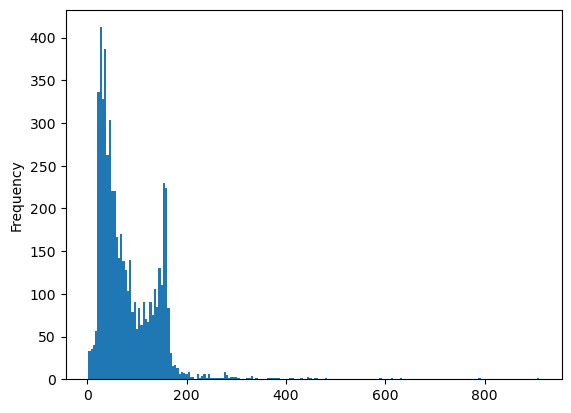

In [23]:
messages['Length'].plot.hist(bins=200)
plt.show()

In [25]:
messages['Length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

In [27]:
messages[messages['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

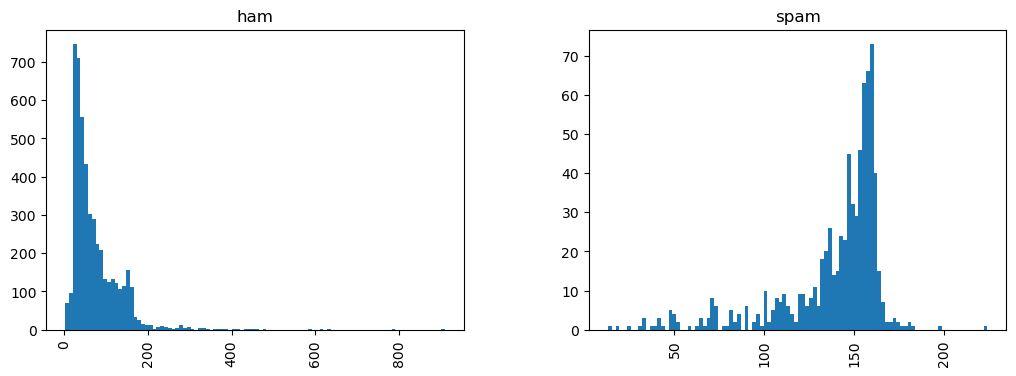

In [29]:
messages.hist(column='Length',by='Label',bins=100,figsize=(12,4))
plt.show()

NLP

In [32]:
import string

from nltk.corpus import stopwords
#stopwords.words('english')

In [34]:
def text_process(mess):
    '''
    - remove punctuation
    - remove stop words
    - return list of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [36]:
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

words_transformer = CountVectorizer(analyzer=text_process).fit(messages['Message'])
print(len(words_transformer.vocabulary_))

11304


In [45]:
mess4 = messages['Message'][3]
mess_trans = words_transformer.transform([mess4])
print(mess4)
print(mess_trans)
print(mess_trans.shape)

U dun say so early hor... U c already then say...
  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


In [47]:
words_transformer.get_feature_names_out()[9445]

'say'

In [49]:
messages_words = words_transformer.transform(messages['Message'])
print('Shape fo the Sparse Matrix: ', messages_words.shape)
print('non zero elements: ', messages_words.nnz)

Shape fo the Sparse Matrix:  (5572, 11304)
non zero elements:  50193


In [51]:
sparsity = (100.0 * messages_words.nnz / (messages_words.shape[0] * messages_words.shape[1]))
print ('sparsity: {}'.format(sparsity))   # compares non zero mesages to total number of messages

sparsity: 0.07968927896991783


In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_words)

tfidf4 = tfidf_transformer.transform(mess_trans)
print(tfidf4)

  (0, 3996)	0.40924708612713745
  (0, 4551)	0.2658577663389999
  (0, 5179)	0.29691956751452986
  (0, 6118)	0.29915512955364754
  (0, 6136)	0.31831430113070225
  (0, 7091)	0.4383755192354929
  (0, 9445)	0.5391515179363723


In [59]:
messages_tfidf = tfidf_transformer.transform(messages_words)

Model training

In [64]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB()
spam_detect_model.fit(messages_tfidf, messages['Label'])
spam_detect_model.predict(tfidf4)[0]

'ham'

In [66]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['Message'], messages['Label'], test_size = 0.2, random_state = 27)


In [70]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ( 'messages_words', CountVectorizer(analyzer=text_process) ),
        ( 'tfidf', TfidfTransformer() ),
        ( 'classifier', MultinomialNB() )
 ])

pipeline.fit(msg_train, label_train)

Pipeline(steps=[('messages_words',
                 CountVectorizer(analyzer=<function text_process at 0x13f2f2520>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

Predictions and Testing

In [74]:
predictions = pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(label_test,predictions))
print(confusion_matrix(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       957
        spam       1.00      0.70      0.83       158

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

[[957   0]
 [ 47 111]]
